In [24]:
import numpy as np
import progressbar
from tqdm import tqdm
import tensorflow as tf
from pyDOE import *
import matplotlib.pyplot as plt
from cosmopower import cosmopower_NN

In [25]:
cp_nn_lin = cosmopower_NN(restore=True, restore_filename='outputs/lin_matter_power_emulator')
cp_nn_boost = cosmopower_NN(restore=True, restore_filename='outputs/boost_matter_power_emulator')

In [26]:
cp_nn_lin.parameters,cp_nn_boost.parameters

(ListWrapper(['omch2', 'obh2', 'h', 'n_s', 'S8', 'z']),
 ListWrapper(['omch2', 'obh2', 'h', 'n_s', 'S8', 'A_bary', 'z']))

In [27]:
params_linear = np.load('outputs/test_parameter_linear.npz')
params_boost = np.load('outputs/test_parameter_boost.npz')

In [29]:
predicted_testing_spectra = cp_nn_lin.ten_to_predictions_np(params_linear)
predicted_testing_boost = cp_nn_boost.predictions_np(params_boost)

In [30]:
testing_spectra = np.load('outputs/linear_matter_test.npz')
testing_boost = np.load('outputs/non_linear_boost_test.npz')

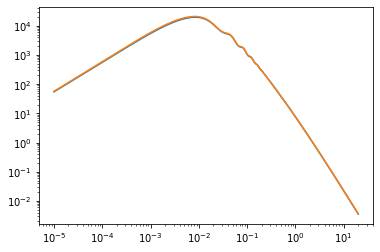

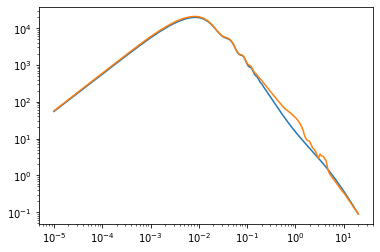

In [31]:
i=4
k_modes = testing_spectra['modes']
plt.loglog(k_modes,testing_spectra['features'][i])
plt.loglog(k_modes,predicted_testing_spectra[i])
plt.show()


plt.loglog(k_modes,testing_spectra['features'][i]*testing_boost['features'][i])
plt.loglog(k_modes,predicted_testing_spectra[i]*predicted_testing_boost[i])
plt.show()


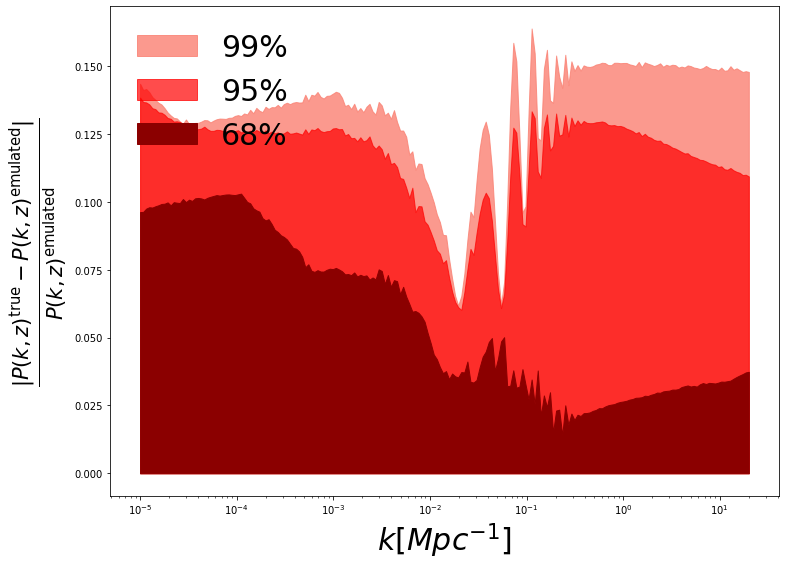

In [35]:
diff=np.abs((testing_spectra['features']-predicted_testing_spectra)/predicted_testing_spectra)

# Compute percentiles
percentiles = np.zeros((4, diff.shape[1]))

percentiles[0] = np.percentile(diff, 68, axis = 0)
percentiles[1] = np.percentile(diff, 95, axis = 0)
percentiles[2] = np.percentile(diff, 99, axis = 0)
percentiles[3] = np.percentile(diff, 99.9, axis = 0)


plt.figure(figsize=(12, 9))
plt.fill_between(k_modes, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
plt.fill_between(k_modes, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
plt.fill_between(k_modes, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)
plt.xscale('log')


plt.legend(frameon=False, fontsize=30, loc='upper left')
plt.ylabel(r'$\frac{| P(k,z)^{\rm{true}} - P(k,z)^{\rm{emulated}} |} {P(k,z)^{\rm{emulated}} }$', fontsize=30)
plt.xlabel(r'$k [Mpc^{-1}]$',  fontsize=30)

plt.savefig('plots/linear_power_difference.jpg',dpi=200,bbox_inches='tight')

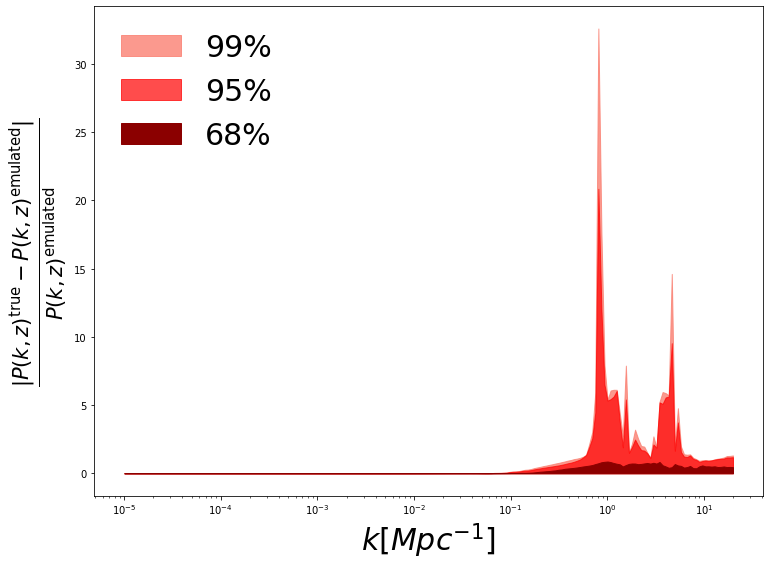

In [36]:
diff=np.abs((testing_boost['features']-predicted_testing_boost)/predicted_testing_boost)

# Compute percentiles
percentiles = np.zeros((4, diff.shape[1]))

percentiles[0] = np.percentile(diff, 68, axis = 0)
percentiles[1] = np.percentile(diff, 95, axis = 0)
percentiles[2] = np.percentile(diff, 99, axis = 0)
percentiles[3] = np.percentile(diff, 99.9, axis = 0)


plt.figure(figsize=(12, 9))
plt.fill_between(k_modes, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
plt.fill_between(k_modes, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
plt.fill_between(k_modes, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)
plt.xscale('log')


plt.legend(frameon=False, fontsize=30, loc='upper left')
plt.ylabel(r'$\frac{| P(k,z)^{\rm{true}} - P(k,z)^{\rm{emulated}} |} {P(k,z)^{\rm{emulated}} }$', fontsize=30)
plt.xlabel(r'$k [Mpc^{-1}]$',  fontsize=30)

plt.savefig('plots/boost_difference.jpg',dpi=200,bbox_inches='tight')

In [ ]:
mean_diff = np.mean(diff,axis=1)

testing_parameters = np.load('outputs/paramters_for_testing.npz')
parameter_names = ['wc','wb','As','h','ns','z']
fig, axes = plt.subplots(figsize=(10, 10),ncols=5, nrows=5,sharex='col',sharey='row')

for i in range(5):
    for j in range(5):
        if(i<=j):
            axes[j,i].scatter(testing_parameters[parameter_names[i]], testing_parameters[parameter_names[j+1]],s=1,c=mean_diff,vmin=0.0001,vmax=0.001)
            axes[j,i].set_xlabel(parameter_names[i],size=15)
            axes[j,i].set_ylabel(parameter_names[j+1],size=15)
        else:
            axes[j, i].axis('off')
for ax in axes.flat:
    ax.label_outer()

plt.savefig('plots/power_distribution.jpg',dpi=200,bbox_inches='tight')
plt.show()